Importing training_set and test_set via pandas \
Goal: predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

In [36]:
import pandas as pd 

training_set = pd.read_csv("data/train.csv")
test_set = pd.read_csv("data/test.csv")


Light data exploration

In [37]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 entries, 12 attributes \
Missing data in ['Age', 'Cabin', 'Embarked'] \
Cabin's missing data: more than 78%

In [39]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
training_set.set_index("PassengerId")
test_set.set_index("PassengerId")

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [55]:
categorical_attributes = training_set.select_dtypes(include='object').columns.tolist()
numeric_attributes = [col for col in list(training_set.columns) if col not in categorical_attributes]
numeric_attributes.remove('PassengerId')


Numerical attribute

In [ ]:
training_set['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

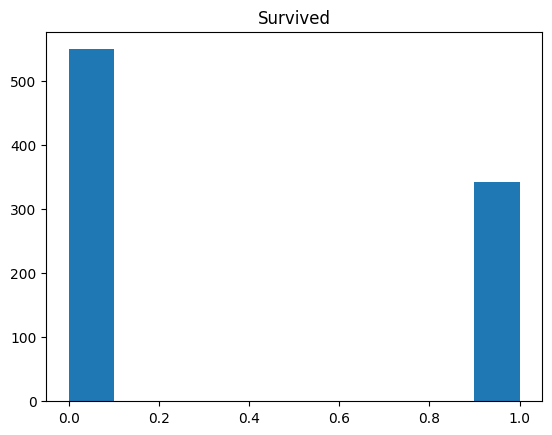

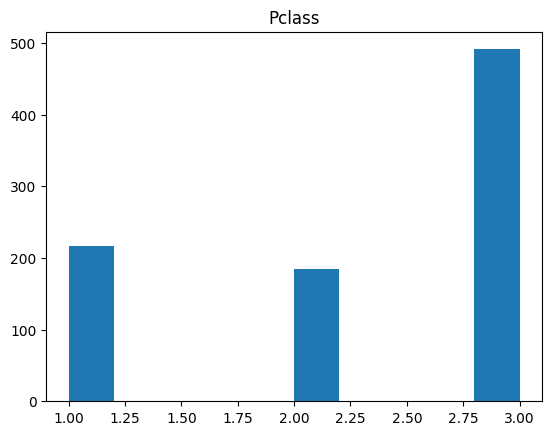

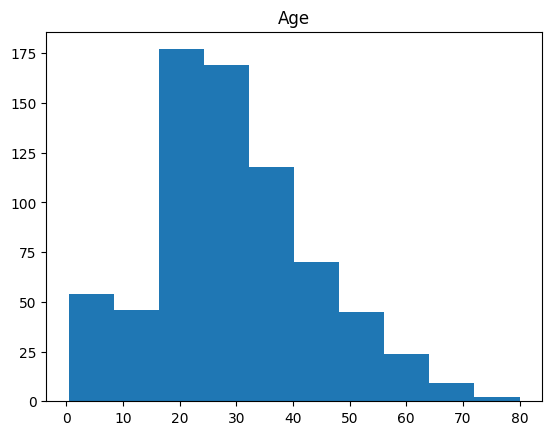

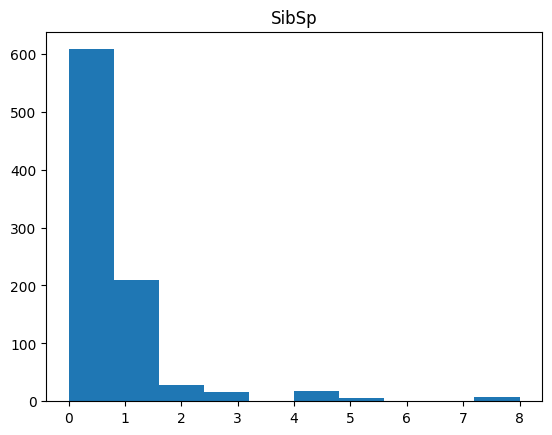

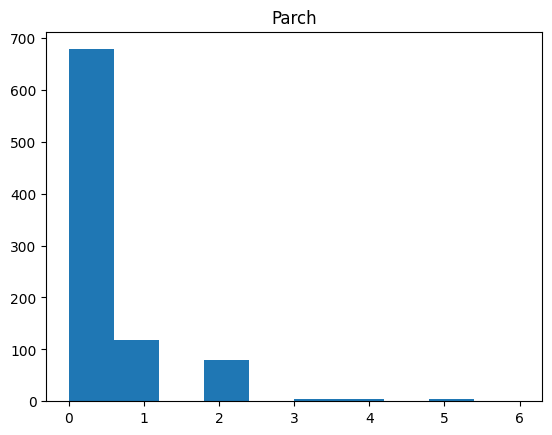

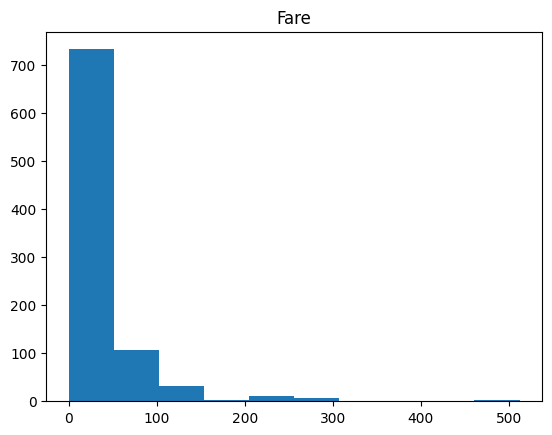

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in numeric_attributes:
    plt.hist(training_set[i])
    plt.title(i)
    plt.show()

Age: normal distribution \
SibSp, Parch, Fare might need normalization



In [ ]:
print(pd.pivot_table(training_set, index='Survived', columns='Sex', values="Name" , aggfunc='count'))
print()
print(pd.pivot_table(training_set, index='Survived', columns='Pclass', values="Name" , aggfunc='count'))


Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Correlation 

<Axes: >

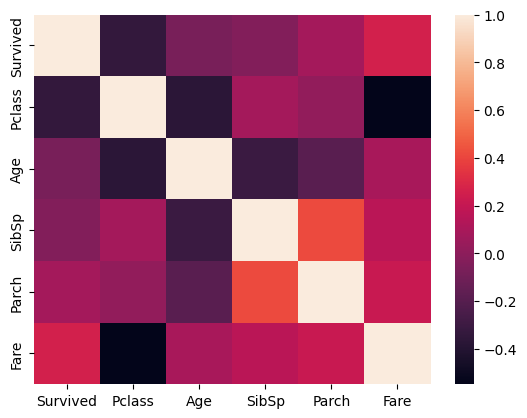

In [61]:
import seaborn as sns
numeric_attributes_dataframe = training_set[numeric_attributes]
sns.heatmap(numeric_attributes_dataframe.corr())

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xla

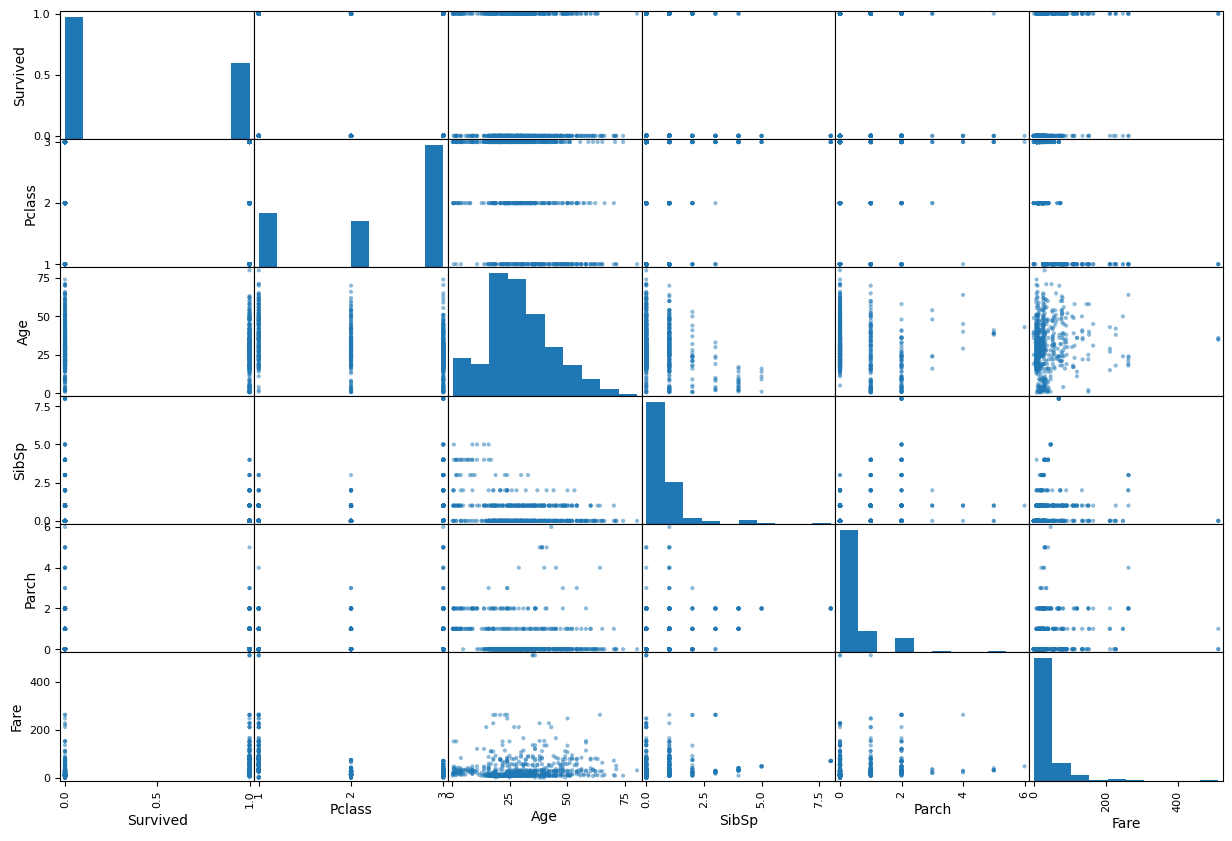

In [64]:
from pandas.plotting import scatter_matrix
scatter_matrix(training_set[numeric_attributes], figsize=(15,10))

Linear model might not perform well

Categorical attributes 

In [52]:
for attribute in categorical_attributes:
    if attribute not in ['Name', 'Cabin', 'Ticket']:
        print(training_set[attribute].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
pd.pivot_table(training_set, index='Survived', values=["Pclass", "Age", "SibSp", "Parch", "Fare"], aggfunc='mean')

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


In [82]:
print(pd.pivot_table(training_set, index='Survived', columns='Sex', values="Name" , aggfunc='count'))
print()
print(pd.pivot_table(training_set, index='Survived', columns='Pclass', values="Name" , aggfunc='count'))


Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Create a pipeline to process the data.\
Split into 2 categories: numerical and categorical \
Create 2 seperate pipelines to process each of the kind and then merge them into 1

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [124]:
from sklearn.preprocessing import OneHotEncoder
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("1hot", OneHotEncoder())
])

In [125]:

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', categorical_pipeline, cat_attribs)],
    remainder='drop'
)

In [126]:
training_set_prepared = full_pipeline.fit_transform(training_set)

Trying RandomForestClassifier

In [127]:
y_train = training_set['Survived'].copy()

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, 15],
    'bootstrap': [True, False],
    'min_samples_leaf' : [1, 5, 10, 20]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, return_train_score=True)
grid_search.fit(training_set_prepared, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [2, 5, ...], 'min_samples_leaf': [1, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,50


In [133]:
rf_clf = RandomForestClassifier(**grid_search.best_params_)
rf_clf.fit(training_set_prepared, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
test_set_prepared = full_pipeline.fit_transform(test_set)



In [142]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(rf_clf, training_set_prepared, y_train, cv=10)
forest_scores.mean()



np.float64(0.8283270911360798)

In [143]:
res_prediction = rf_clf.predict(test_set_prepared)

In [144]:
final_data = {'PassengerId': test_set.PassengerId, 'Survived': res_prediction}
submission = pd.DataFrame(data=final_data)

In [147]:
submission.to_csv('submission.csv', index =False)
